In [1]:
import pandas as pd
import os
import math
import operator

In [2]:
it_data = pd.read_csv('/home/fangbing/SipAlarmAnalysis/datas/it_20210712.csv')
print(len(it_data))
it_merge_data = pd.read_csv('/home/fangbing/SipAlarmAnalysis/datas/merge_it_20210712.csv')
print(len(it_merge_data))
lanjun_data = pd.read_csv('/home/fangbing/SipAlarmAnalysis/datas/lanjun_20210712.csv')
print(len(lanjun_data))
lanjun_merge_data = pd.read_csv('/home/fangbing/SipAlarmAnalysis/datas/merge_lanjun_20210712.csv')
print(len(lanjun_merge_data))


218033


KeyboardInterrupt: 

In [5]:
path = "/home/fangbing/SipAlarmAnalysis/paths/lanjun_20210712" 
files= os.listdir(path)
alllist = []
allrelibilitys = []
alllevels = []
alldescs = []
allips = []
alllogids = []
path_values = {}
holeid_list = []
ips_key = []
for f in files:
    rs_df = pd.read_csv(path+"/"+f)
    hids = []
    holeids = list(rs_df['hole_id'])
    for hid in holeids:
        hids.extend([int(v) for v in eval(hid)])
        holeid_list.extend(int(v) for v in eval(hid))
#     hids.sort()
    alllist.append(hids)
    print(hids)
    
    lgids = []
    lgs = list(rs_df['log_id'])
    for lg in lgs:
        lgids.extend(eval(lg))
    alllogids.append(lgids)
    
    rels = []
    relibilitys = list(rs_df['reliability'])
    for rel in relibilitys:
        rels.extend(eval(rel))
    allrelibilitys.append(rels)
    
    levels = []
    levls = list(rs_df['level'])
    for lev in levls:
        levels.extend(eval(lev))
    alllevels.append(levels)
    
    descs = []
    des = list(rs_df['descs'])
    for de in des:
        descs.extend(eval(de))
    alldescs.append(descs)
    
    ips = []
    srcips = list(rs_df['src_ip'])
    dstips = list(rs_df['dst_ip'])
    for sip,dip in zip(srcips,dstips):
        sip_dip = sip+'_'+dip
       
        ips.append(sip_dip)
    allips.append(list(set(ips)))
    ips_key.append(str(ips))
    if path_values.get(str(ips)) is None:
        path_values[str(ips)] = {'all_ips':ips,'all_logids':lgids,'all_descs':descs,'all_levels':levels,'all_relability':rels,'all_hids':hids}
    else:
        path_values[str(ips)]['all_descs'].extend(descs)
        path_values[str(ips)]['all_relability'].extend(rels)
        path_values[str(ips)]['all_hids'].extend(hids)
        path_values[str(ips)]['all_levels'].extend(levels)
        path_values[str(ips)]['all_logids'].extend(lgids)
    
print(len(alllist))
print(len(path_values))

[17891024, 13082002, 17891053]
[17820081, 687, 11080015, 17120015, 17120015, 687, 687, 687, 11000217]
[687, 17120015, 11000217, 17120015, 17891029, 687, 17120015]
[17781001, 17781001]
[17781001, 17781005, 10010258]
[17781001, 17781001, 11080015]
[17781001, 11080015]
[17781001, 11080015]
[17781001, 11080015]
[11080011, 17781005, 17781001, 17660003, 10010258]
[17820081, 11080015]
[17120015, 687, 687, 11080015, 11080015]
[11080015, 11000217, 687, 687, 17120015, 687]
[17781001, 17660003, 17781005, 17781001, 10010258]
[17781005, 17660003, 17781001, 10010258]
[17781001, 17781005, 17781001, 10010258]
[17781005, 17781001, 10010258]
[17781001, 17810012, 17810006]
[17781001, 17660003, 17781001, 17781005, 10010258]
[10010258, 17781001, 17781005, 17781001, 10010258]
[17660003, 17781005, 17781001, 10010258]
[17781001, 17781001, 17660003, 17781001, 17781005, 10010258]
[17781001, 17660003, 17781005, 17781001, 10010258]
[17660003, 17781005, 17781001, 10010258]
[17781001, 17781005, 17781001, 10010258]


In [4]:
hole_idx = {}
for idx,hole in enumerate(list(set(holeid_list))):
    hole_idx[hole] = idx+1
print(hole_idx)

{17660003: 1, 17781001: 2, 11080011: 3, 17891053: 4, 17781005: 5, 687: 6, 17891024: 7, 17820081: 8, 13082002: 9, 11080015: 10, 17120015: 11, 17891029: 12, 10010258: 13, 17810006: 14, 11000217: 15, 17871002: 16, 17810012: 17}


In [167]:
def freqword(wordlis):  # 统计词频，并返回字典
    freword = {}
    for i in wordlis:
        if str(i) in freword:
            count = freword[str(i)]
            freword[str(i)] = count+1
        else:
            freword[str(i)] = 1
    return freword

def wordinfilecount(word, corpuslist):  # 查出包含该词的文档数
    count = 0  # 计数器
    for i in corpuslist:
        if word in set(i):  # 只要文档出现该词，这计数器加1，所以这里用集合
            count = count+1
        else:
            continue
    return count

def tf_idf(wordlis, filelist, corpuslist):  # 计算TF-IDF,并返回字典
    outdic = {}
    tf = 0
    idf = 0
    dic = freqword(wordlis)
    outlis = []
    for i in set(wordlis):
        tf = dic[str(i)]/len(wordlis)  # 计算TF：某个词在文章中出现的次数/文章总词数
        # 计算IDF：log(语料库的文档总数/(包含该词的文档数+1))
        idf = math.log(len(filelist)/(wordinfilecount(str(i), corpuslist)+1))
        tfidf = tf*idf  # 计算TF-IDF
        outdic[str(i)] = tfidf
    orderdic = sorted(outdic.items(), key=operator.itemgetter(1), reverse=True)  # 给字典排序
    return orderdic

In [185]:
ips_tfidf = {}
for ips, path in zip(ips_key,alllist):
    tfidfdic = tf_idf(path, alllist, alllist)  
    print(ips,tfidfdic)
    ips_tfidf[ips] = tfidfdic

['10.67.201.38_192.168.10.45', '10.67.201.38_192.168.10.45'] [('17891024', 1.3296613488547582), ('13082002', 1.3296613488547582), ('17891053', 1.3296613488547582)]
['10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199'] [('687', 1.7728817984730108), ('17120015', 0.8864408992365054), ('11080015', 0.4432204496182527), ('17820081', 0.4432204496182527), ('11000217', 0.4432204496182527)]
['10.67.202.42_192.168.137.19', '10.67.202.42_192.168.137.19', '10.67.202.42_192.168.137.19', '192.168.137.19_10.67.202.42', '10.67.202.42_192.168.137.19'] [('17120015', 1.709564591384689), ('687', 1.1397097275897927), ('11000217', 0.5698548637948964), ('17891029', 0.5698548637948964)]
['192.168.10.14_192.168.10.100', '192.168.10.14_192.168.10.100'] [('17781001', 3.9889840465642745)]
['192.168.10.23_10.67.201.80', '192.168.10.23_10.67.201.80'] [('17781001', 1.3296613488547582), 

In [6]:
count = 0
# for ips,rels,levs,descs in zip(allips,allrelibilitys,alllevels,alldescs):
for ips,values in path_values.items():
    ips = values.get('all_ips')
    rels = values.get('all_relability')
    levs = values.get('all_levels')
    descs = values.get('all_descs')
    logids = values.get('all_logids')
    if 1 in rels or 2 in rels:
        if 1 in levs or 2 in levs:
            print('logids==',logids)
            print(ips,descs)
            count+=1
print(count)

logids== ['6820362348814868480', '6820362348810674176', '6820360745319366662', '6820360745319366660', '6820360745319366661', '6820360745319366663', '6820360745319366664', '6820378291250626566', '6820360745319366665', '6820360745319366666']
['10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199', '10.67.201.41_192.168.10.199'] ['主机发起TCP扫描, 在同一端口扫描多个主机', '', '', '', '', '', '', '', '']
logids== ['6820309603478634496', '6820309603478634497', '6820309603478634498', '6820309645643972609', '6820310461860827136', '6820309645643972608', '6820309645643972611', '6820309645643972610', '6820309658243661824', '6820309658243661825', '6820309746407931904', '6820309746407931905', '6820309788468412417', '6820309788468412416', '6820309939622739970', '6820309939622739968', '6820309939622739969', '6820309939622739971']
['10.67.202.42_192.168.137.19', '10.67.202.42_192.168.137.19', '10.67.202.42_192.168.137.1

In [187]:
count = 0
holeidx = []
label = []
max_len = 0
label_msg = {}
tfidfs = []
for ips,values in path_values.items():
    ips = values.get('all_ips')
    rels = values.get('all_relability')
    levs = values.get('all_levels')
    descs = values.get('all_descs')
    holes = values.get('all_hids')
    if 1 in rels or 2 in rels:
        if 1 in levs or 2 in levs:
            count+=1
            hids = []
            for hid in holes:
                hids.append(hole_idx[hid])
            hids = list(set(hids))
            if len(hids) > max_len:
                max_len=len(hids)
            holeidx.append(hids)
            label.append(count)
            label_msg[count] = (holes,descs)
            
            idfs = []
            for idf in ips_tfidf.get(str(ips)):
                idfs.append(idf[1])
            tfidfs.append(idfs)
print(tfidfs)
print(count)
print(max_len)

[[1.7728817984730108, 0.8864408992365054, 0.4432204496182527, 0.4432204496182527, 0.4432204496182527], [1.709564591384689, 1.1397097275897927, 0.5698548637948964, 0.5698548637948964], [3.9889840465642745], [1.3296613488547582, 1.3296613488547582, 1.3296613488547582], [2.6593226977095163, 1.3296613488547582], [1.9944920232821373, 1.9944920232821373], [1.9944920232821373, 1.9944920232821373], [1.9944920232821373, 1.9944920232821373], [0.7977968093128549, 0.7977968093128549, 0.7977968093128549, 0.7977968093128549, 0.7977968093128549], [1.9944920232821373, 1.9944920232821373], [1.5955936186257098, 1.5955936186257098, 0.7977968093128549], [1.9944920232821373, 0.6648306744273791, 0.6648306744273791, 0.6648306744273791], [1.5955936186257098, 0.7977968093128549, 0.7977968093128549, 0.7977968093128549], [0.9972460116410686, 0.9972460116410686, 0.9972460116410686, 0.9972460116410686], [1.9944920232821373, 0.9972460116410686, 0.9972460116410686], [1.3296613488547582, 1.3296613488547582, 1.3296613

In [188]:
expand_holeidx = []
for hidx in tfidfs:
    if len(hidx) < max_len:
        hidx.extend([0]*(max_len-len(hidx)))
    expand_holeidx.append(hidx)
print(expand_holeidx)

[[1.7728817984730108, 0.8864408992365054, 0.4432204496182527, 0.4432204496182527, 0.4432204496182527, 0], [1.709564591384689, 1.1397097275897927, 0.5698548637948964, 0.5698548637948964, 0, 0], [3.9889840465642745, 0, 0, 0, 0, 0], [1.3296613488547582, 1.3296613488547582, 1.3296613488547582, 0, 0, 0], [2.6593226977095163, 1.3296613488547582, 0, 0, 0, 0], [1.9944920232821373, 1.9944920232821373, 0, 0, 0, 0], [1.9944920232821373, 1.9944920232821373, 0, 0, 0, 0], [1.9944920232821373, 1.9944920232821373, 0, 0, 0, 0], [0.7977968093128549, 0.7977968093128549, 0.7977968093128549, 0.7977968093128549, 0.7977968093128549, 0], [1.9944920232821373, 1.9944920232821373, 0, 0, 0, 0], [1.5955936186257098, 1.5955936186257098, 0.7977968093128549, 0, 0, 0], [1.9944920232821373, 0.6648306744273791, 0.6648306744273791, 0.6648306744273791, 0, 0], [1.5955936186257098, 0.7977968093128549, 0.7977968093128549, 0.7977968093128549, 0, 0], [0.9972460116410686, 0.9972460116410686, 0.9972460116410686, 0.99724601164106

In [189]:
import numpy as np
from sklearn import preprocessing, svm
train = np.array(expand_holeidx)
print(train)
normalizer = preprocessing.MinMaxScaler().fit(train)
train_data = normalizer.transform(train)
print(train_data)

[[1.7728818  0.8864409  0.44322045 0.44322045 0.44322045 0.        ]
 [1.70956459 1.13970973 0.56985486 0.56985486 0.         0.        ]
 [3.98898405 0.         0.         0.         0.         0.        ]
 [1.32966135 1.32966135 1.32966135 0.         0.         0.        ]
 [2.6593227  1.32966135 0.         0.         0.         0.        ]
 [1.99449202 1.99449202 0.         0.         0.         0.        ]
 [1.99449202 1.99449202 0.         0.         0.         0.        ]
 [1.99449202 1.99449202 0.         0.         0.         0.        ]
 [0.79779681 0.79779681 0.79779681 0.79779681 0.79779681 0.        ]
 [1.99449202 1.99449202 0.         0.         0.         0.        ]
 [1.59559362 1.59559362 0.79779681 0.         0.         0.        ]
 [1.99449202 0.66483067 0.66483067 0.66483067 0.         0.        ]
 [1.59559362 0.79779681 0.79779681 0.79779681 0.         0.        ]
 [0.99724601 0.99724601 0.99724601 0.99724601 0.         0.        ]
 [1.99449202 0.99724601 0.99724601

In [174]:
print(label)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [206]:
from sklearn import preprocessing, svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.stattools import adfuller, acf
def get_ensemble_result(train_data, label):
    final_result = []
    alert_score_dict = {}
    outliers_fraction = 0.2
    rng = np.random.RandomState(100)
    for clf in [LocalOutlierFactor(contamination=outliers_fraction, novelty=True),  # LOF
                EllipticEnvelope(contamination=outliers_fraction, random_state=rng),  # EllipticEnvelope
                IsolationForest(random_state=rng, contamination=outliers_fraction),  # Isolation Forest
                svm.OneClassSVM(nu=outliers_fraction, gamma=0.1)]:  # one class svm
        clf.fit(train_data)
        y_pred_train = clf.predict(train_data)
        for each_index in range(len(y_pred_train)):
            if y_pred_train[each_index] == -1:
                final_result.append(label[each_index])
        score_list = list(clf.decision_function(train_data))
        score_index_sorted = sorted(range(len(score_list)), key=lambda k: score_list[k], reverse=True)
        for each_index in score_index_sorted:
            key, value = label[each_index], score_index_sorted.index(each_index)
            if key in alert_score_dict:
                alert_score_dict[key] += value
            else:
                alert_score_dict[key] = value
    return final_result, alert_score_dict

final_result, alert_score_dict = get_ensemble_result(train, label)
print(final_result)
print(alert_score_dict)

[3, 47, 51, 52, 53, 3, 5, 6, 7, 8, 10, 41, 51, 52, 53, 1, 3, 5, 9, 11, 19, 40, 47, 51, 52, 53, 3, 6, 7, 8, 9, 10, 41, 47, 51, 52, 53]
{37: 86, 42: 90, 14: 57, 20: 61, 23: 65, 25: 69, 30: 73, 31: 77, 34: 81, 35: 85, 36: 89, 45: 93, 13: 24, 18: 28, 22: 32, 27: 36, 28: 40, 33: 44, 38: 48, 44: 52, 50: 56, 2: 93, 12: 52, 21: 56, 26: 60, 46: 64, 49: 68, 1: 115, 15: 85, 24: 89, 32: 93, 48: 97, 40: 100, 11: 140, 19: 144, 4: 121, 16: 125, 17: 129, 29: 133, 39: 137, 43: 141, 9: 178, 5: 160, 6: 170, 7: 174, 8: 178, 10: 182, 41: 186, 47: 188, 3: 186, 51: 190, 52: 194, 53: 198}


In [207]:
from collections import Counter
counters = Counter(final_result).most_common()
print(counters)
print(len(counters))

[(3, 4), (51, 4), (52, 4), (53, 4), (47, 3), (5, 2), (6, 2), (7, 2), (8, 2), (10, 2), (41, 2), (9, 2), (1, 1), (11, 1), (19, 1), (40, 1)]
16


In [208]:
# sorted(alert_score_dict, key=lambda x: [x[1:4]], reverse=True)
print(sorted(alert_score_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))     

[(53, 198), (52, 194), (51, 190), (47, 188), (41, 186), (3, 186), (10, 182), (9, 178), (8, 178), (7, 174), (6, 170), (5, 160), (19, 144), (43, 141), (11, 140), (39, 137), (29, 133), (17, 129), (16, 125), (4, 121), (1, 115), (40, 100), (48, 97), (45, 93), (32, 93), (2, 93), (42, 90), (36, 89), (24, 89), (37, 86), (35, 85), (15, 85), (34, 81), (31, 77), (30, 73), (25, 69), (49, 68), (23, 65), (46, 64), (20, 61), (26, 60), (14, 57), (50, 56), (21, 56), (44, 52), (12, 52), (38, 48), (33, 44), (28, 40), (27, 36), (22, 32), (18, 28), (13, 24)]


In [209]:
print(label_msg[9])
print(label_msg[47])
print(label_msg[1])
print(label_msg[2])
print(label_msg[17])
print(label_msg[19])
print(label_msg[32])
print(label_msg[50])
print(label_msg[52])
print(label_msg[53])

([11080011, 17781005, 17781001, 17660003, 10010258], ['', 'MS17010攻击', '使用SMB协议创建了可疑文件', 'SMB暴破', ''])
([17820081, 11080011, 17781001, 17781005, 17660003, 10010258], ['主机发起TCP扫描, 在同一端口扫描多个主机', '', '使用SMB协议创建了可疑文件', 'MS17010攻击', 'SMB暴破', ''])
([17820081, 687, 11080015, 17120015, 17120015, 687, 687, 687, 11000217], ['主机发起TCP扫描, 在同一端口扫描多个主机', '', '', '', '', '', '', '', ''])
([687, 17120015, 11000217, 17120015, 17891029, 687, 17120015], ['', '', '', '', '主机疑似存在chisel通信行为', '', '', '', '', '', '', '', '', '', '', '', '', ''])
([17781001, 17810012, 17810006], ['使用SMB协议创建了可疑文件', '主机通过SMB协议对内网主机传输可疑文件', '主机利用SMB对内网传播病毒文件'])
([10010258, 17781001, 17781005, 17781001, 10010258], ['', '使用SMB协议创建了可疑文件', 'MS17010攻击', '使用SMB协议创建了可疑文件', ''])
([10010258, 17781001, 17781005, 10010258], ['', '使用SMB协议创建了可疑文件', 'MS17010攻击', ''])
([17810012, 17781001, 17810006, 17871002, 17781001, 17810012, 17781001, 17810006, 17871002, 17781001], ['主机通过SMB协议对内网主机传输可疑文件', '使用SMB协议创建了可疑文件', '主机利用SMB对内网传播病毒文件', '主机存在svcctl 远

(53, 6)


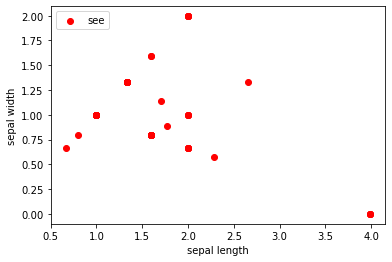

[1 1 2 3 0 0 0 0 1 0 3 1 1 1 3 3 3 1 3 1 1 1 1 3 1 1 1 1 3 1 1 3 1 1 1 1 1
 1 3 1 0 1 3 1 1 1 1 3 1 1 2 2 2]


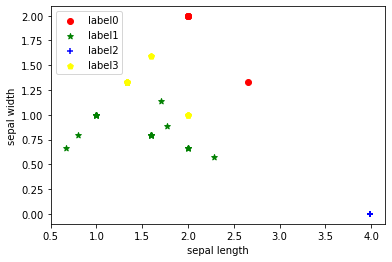

In [204]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn import datasets 
from sklearn.cluster import DBSCAN
  

X = train
print(X.shape)
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see') 
plt.xlabel('sepal length') 
plt.ylabel('sepal width') 
plt.legend(loc=2) 
plt.show() 
  
estimator = KMeans(n_clusters=4) # 构造聚类器
estimator.fit(X) # 聚类
label_pred = estimator.labels_ # 获取聚类标签
print(label_pred)
# 绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
x3 = X[label_pred == 3]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0') 
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1') 
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2') 
plt.scatter(x3[:, 0], x3[:, 1], c="yellow", marker='p', label='label3') 
plt.xlabel('sepal length') 
plt.ylabel('sepal width') 
plt.legend(loc=2) 
plt.show()

In [205]:
ms_rs ={}
print(len(label_pred))
print(len(label_msg))
for index in range(len(label_pred)):
    l = label_pred[index]
    if ms_rs.get(l) is None:
        ms_rs[l] = [label_msg[index+1]]
    else:
        ms_rs[l].append(label_msg[index+1])
for k,v in ms_rs.items():
    print(k,v)
    print('\n')

53
53
1 [([17820081, 687, 11080015, 17120015, 17120015, 687, 687, 687, 11000217], ['主机发起TCP扫描, 在同一端口扫描多个主机', '', '', '', '', '', '', '', '']), ([687, 17120015, 11000217, 17120015, 17891029, 687, 17120015], ['', '', '', '', '主机疑似存在chisel通信行为', '', '', '', '', '', '', '', '', '', '', '', '', '']), ([11080011, 17781005, 17781001, 17660003, 10010258], ['', 'MS17010攻击', '使用SMB协议创建了可疑文件', 'SMB暴破', '']), ([11080015, 11000217, 687, 687, 17120015, 687], ['', '', '', '', '', '', '']), ([17781001, 17660003, 17781005, 17781001, 10010258], ['使用SMB协议创建了可疑文件', 'SMB暴破', 'MS17010攻击', '使用SMB协议创建了可疑文件', '']), ([17781005, 17660003, 17781001, 10010258], ['MS17010攻击', 'SMB暴破', '使用SMB协议创建了可疑文件', '']), ([17781001, 17660003, 17781001, 17781005, 10010258], ['使用SMB协议创建了可疑文件', 'SMB暴破', '使用SMB协议创建了可疑文件', 'MS17010攻击', '']), ([17660003, 17781005, 17781001, 10010258], ['SMB暴破', 'MS17010攻击', '使用SMB协议创建了可疑文件', '']), ([17781001, 17781001, 17660003, 17781001, 17781005, 10010258], ['使用SMB协议创建了可疑文件', 'SMB暴破', '使用SMB协议创建了可疑